# sfg-tbio2018

This notebook shows how to run the source codes used in the following work:

 * Makito Oku: "Two novel methods for extracting synchronously fluctuated genes", IPSJ Transactions on Bioinformatics, to appear.
 
All the source files are in the *scripts* directory, and data files are in the *data* directory. Since large-sized data files are excluded in this repository, please put them into the *data* directory when you run the codes locally.

At first, run *functions.py* to import python packages and define some functions.

In [1]:
%%capture
%matplotlib inline
%cd scripts
%run -i functions.py
plt.plot([1,2]);  # I don't know why but this line is needed to show inline figures at least in my environment.

*plot_example.py* is for plotting Fig. 1 (DEGs) and Fig. 2 (SFGs).

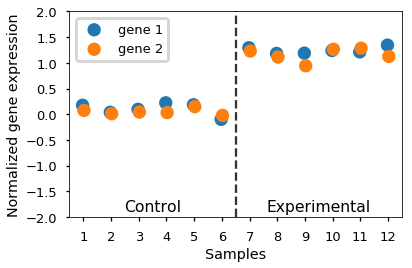

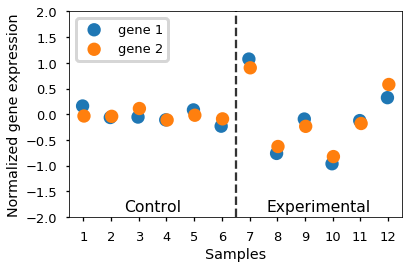

In [2]:
%run -i plot_example.py

## Artificial data

Artificial data are used in order to evaluate the classification performance of methods for extracting SFGs. In *loop_fpr.py*, the number of samples is varied, and the F1 score, precision, and recall are calculated. The results (Fig. 3) are plotted by *plot_fpr.py*.

3
4
5
6
7
8
9
10
15
20
25
30


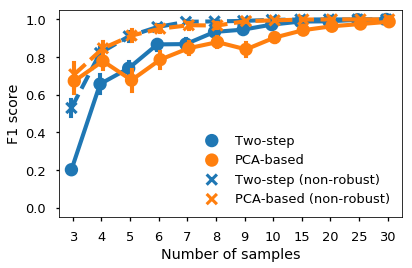

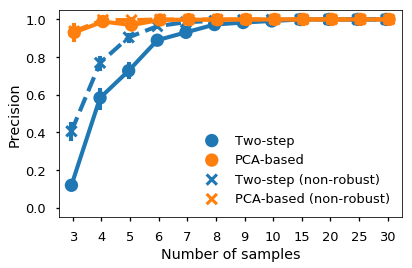

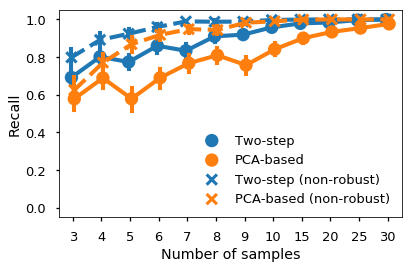

In [3]:
%run -i loop_fpr.py
%run -i plot_fpr.py

## Real data

Real data are used in order to evaluate the reproducibility of methods for extracting SFGs. 

When you run the codes locally, please download two data sets GSE77578 and GPL6885 from [Gene Expression omnibus (GEO)](https://www.ncbi.nlm.nih.gov/geo/) database and put them into the *data* directory.

* link to [GSE77578](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE77578) (click *Series Matrix File(s)*)
* link to [GPL6885](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL6885) (click *Download full table...*)

*load_data.py* is for loading them.

In *loop_jac.py*, the number of removed samples is varied, and the Jaccard index is calculated. The results (Fig. 4) are plotted by *plot_jac.py*.

DEG 1
DEG 2
DEG 3
DEG 4
DEG 5
DEG 6
DEG 7
DEG 8
DEG 9
DEG 10
Two-step 1
Two-step 2
Two-step 3
Two-step 4
Two-step 5
Two-step 6
Two-step 7
Two-step 8
Two-step 9
Two-step 10
Two-step (non-robust) 1
Two-step (non-robust) 2
Two-step (non-robust) 3
Two-step (non-robust) 4
Two-step (non-robust) 5
Two-step (non-robust) 6
Two-step (non-robust) 7
Two-step (non-robust) 8
Two-step (non-robust) 9
Two-step (non-robust) 10
PCA-based 1
PCA-based 2
PCA-based 3
PCA-based 4
PCA-based 5
PCA-based 6
PCA-based 7
PCA-based 8
PCA-based 9
PCA-based 10
PCA-based (non-robust) 1
PCA-based (non-robust) 2
PCA-based (non-robust) 3
PCA-based (non-robust) 4
PCA-based (non-robust) 5
PCA-based (non-robust) 6
PCA-based (non-robust) 7
PCA-based (non-robust) 8
PCA-based (non-robust) 9
PCA-based (non-robust) 10


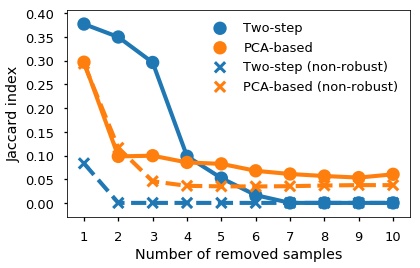

In [4]:
%run -i load_data.py
%run -i loop_jac.py
%run -i plot_jac.py

*plot_heatmap.py* is for plotting four heatmaps below.
* Fig. 5: Two-step method
* Fig. 6: non-robust two-step method
* Fig. 7: PCA-based method
* Fig. 8: non-robust PCA-based method

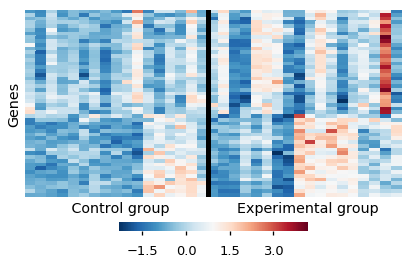

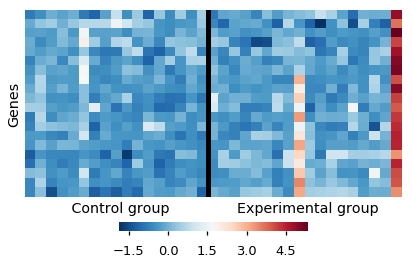

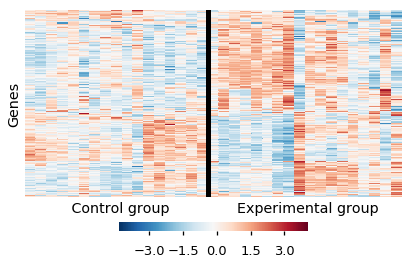

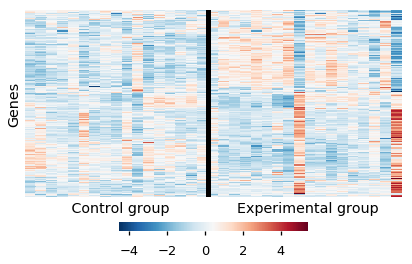

In [5]:
%run -i plot_heatmap.py

*plot_mean_dist.py* is for plotting Fig. 9.

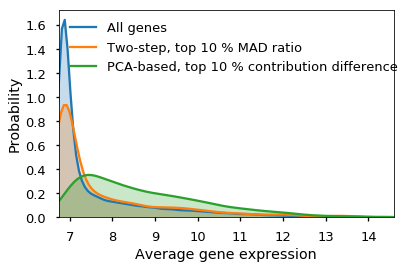

In [6]:
%run -i plot_mean_dist.py

## Enrichment analysis

Gene ontology (GO) enrichment analysis is performed using [DAVID (Database for Annotation, Visualization and Integrated Discovery)](https://david.ncifcrf.gov) database. This requires the following steps:
1. Output genes to files.
2. Upload each file to DAVID, do the analysis, and download the results.
3. Do some post-processing using python.

**The first step** is done by *save_gene_batch.py*. This outputs three files *sfg_two.txt*, *sfg_pca.txt*, and *deg.txt* under the *data* directory, which correspond SFGs extracted by the two-step method, SFGs extracted by the PCA-based methods, and DEGs, respectively.

In [7]:
%run -i save_gene_batch.py

**The second step** is as follows:
* Go to [DAVID](https://david.ncifcrf.gov).
* Select *Start Analysis* at the top menu.
* Select *Upload* at the left menu.
  * Step 1: Choose *sfg_two.txt*, *sfg_pca.txt*, or *deg.txt*.
  * Step 2: Select *OFFICIAL_GENE_SYMBOL*.
  * Step 3: Select *Gene List*.
  * Step 4: Click *Submit List*.
* If a warning message saying that "multiple species have been detected..." click *OK*.
* If an error message related to "Gene ID Conversion" appears, select *Option 1 (Recommended)*.
* Select *Mus Musculus* at the left panel and click *Select Species* (**don't forget it**).
* Check the right heading. If it is *Annotation Summary Results*, go to the next step. If it is *Analysis Wizard*, click *Functional Annotation Tool*.
* Check *Current Background*. If it is *Mus Musculus*, go to the next step. Otherwise, open *Backgroup* tab at the left menu, select the correct species from the scrolling list, and click *Use* button.
* Select *Gene Ontology*, find *GOTERM_BP_FAT* in the list, and click the corresponding *Chart* button (**not the bar**).
* In a new window, click *Options* to expand it. Set *EASE* (the threshold against raw p-values) to 1, and click *Rerun Using Options*.
* Right click *Download File* and save it to a file.

The results for the two step method, PCA-based method, and DEGs are named as *sfg_two_go.txt*, *sfg_pca_go.txt*, and *deg_go.txt*, respectively, and put into the *data* diretory. 

**The third step** is done by *enrichment.py*. It generates the following tables.
* Table 2: SFGs extracted using the two-step method
* Table 3: SFGs extracted using the PCA-based method
* Table 4: DEGs

In [8]:
%run -i enrichment.py

number of tests: 351
                                                Term  Count  List Total  \
0                               midbrain development      3          27   
1  positive regulation of lamellipodium organization      2          27   
3           regulation of lamellipodium organization      2          27   

   Pop Hits  Pop Total  p-value  q-value  
0        87      17911  3.0e-04  1.0e-01  
1        27      17911  7.5e-04  1.3e-01  
3        40      17911  1.6e-03  1.9e-01  

number of tests: 2196
                                                  Term  Count  List Total  \
4                     regulation of cell communication     53         183   
5                              regulation of signaling     53         183   
87                       response to organic substance     48         183   
6        regulation of cellular component organization     47         183   
32                       cellular component biogenesis     46         183   
161           positiv